# Couche limite

**Marc BUFFAT, Dpt Mécanique, Lyon 1**

https://en.wikipedia.org/wiki/Boundary_layer
<img src="Images/Laminar_boundary_layer.png" width="700">

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

## Couche limite

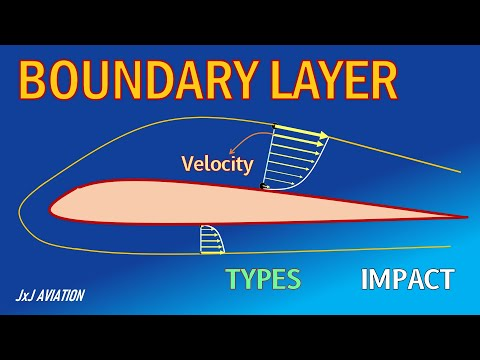

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('GgVCTNCwfQk', width=600, height=400)

### Fundamentals of Boundary Layers (MIT)

In [3]:
from IPython.display import IFrame
IFrame("https://techtv.mit.edu/videos/a081da3d343242bd845ab379f72c281c/embed/",width="560",height="315")

$\newcommand{\D}[1]{\frac{d#1}{dx}} $

## Equation de Blasius

Avec les hypothèses de couche limite bi-dimensionnelle sans gradient de pression (voir  https://en.wikipedia.org/wiki/Blasius_boundary_layer), les composantes de vitesse s'écrivent en fonction de $\psi(x,y)$, la fonction de courant

$$ u(x,y) = \frac{\partial \psi}{\partial y} \;\; v(x,y) = -\frac{\partial \psi}{\partial x}$$

dont on cherche une forme auto-similaire en éffectuant un changement de variable


### Recherche d'une solution auto-similaire
$$ \eta = y \sqrt{\frac{U_0}{\nu x }} $$ 

solution en fonction de courant $\psi(x,y)$

$$ \psi(x,y) = \sqrt{\nu U_0 x} f(\eta) $$

où $f(\eta)$ est solution de 
$$ f''' + f f'' = 0 $$
avec les conditions:
$f(0)=0$ , $f'(0)=0$ et $f''(\infty) = 1 $

**Problème:** ce n'est pas une ODE classique, car on a pas 3 conditions initiales !!!


Il faut donc trouvez la condition initiale manquante $\beta$
$$f(0)=0 \mbox{ et }f'(0)=0 \mbox{ et } f''(0)=\beta $$
telle que $f''(\infty) = 1 $

$\rightarrow$ résolution numérique par transformation en ODE d'ordre 1

### ODE d'ordre 3 transformée en 3 ODEs d'ordre 1
 
   $$\D{Y} = F(Y,t)$$   
   forme canonique: ODE d'ordre 1
   $$\D{Y_1} = Y_2  ,  \D{Y_2} = Y_3 , \D{Y_3} = -Y_1\,Y_3$$
   C.L.
   $$ Y_1(0)=0 ,  Y_2(0)=0, Y_3(0)=\beta_0, \mbox{  t.q.   }Y_\infty = Y_2(10)=1 $$


### on en déduit la solution autosimilaire fonction de $f(\eta)$

$$ \eta = y \sqrt{\frac{U_0}{\nu x }} $$ 

\begin{eqnarray} 
u(x,y) &=& U_0 f'(\eta) \\
v(x,y) &=& \frac{1}{2} \sqrt{\frac{\nu U_0}{x }}(\eta f'(\eta) - f(\eta))
\end{eqnarray}

### résolution numérique
Utilisation de solveur classique ODE

In [4]:
from scipy.integrate import odeint

def ODEBlasius(x,Y):
    '''systeme ODE Blasius'''
    dY = np.array([Y[1],Y[2],-Y[0]*Y[2]])
    return dY
def Blasius(beta0):
    """resoud BLASIUS pour une valeur de beta"""
    Tmax = 10.
    X  = np.linspace(0,Tmax,500)
    Y0 = np.array([0,0,beta0])
    Y  = odeint(ODEBlasius,Y0,X,tfirst=True)
    return X,Y
def ErrBlasius(beta):
    """calcul l'erreur sur la CL en 0"""
    X,Y = Blasius(beta[0])
    err = Y[-1,1] - 1.0
    #print("beta={} err={}".format(Beta[0],err))
    return err

Problème choix de la bonne valeur de $\beta$!

err= -0.25824224252589445


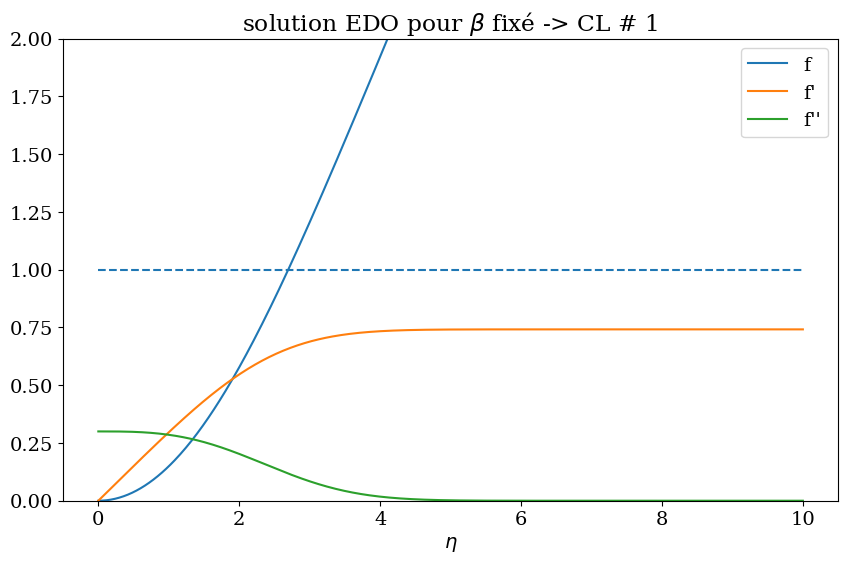

In [5]:
# verification pour beta = 0.3
beta0 = 0.3
X,Y = Blasius(beta0)
print("err=",ErrBlasius([beta0]))
plt.figure(figsize=(10,6))
plt.plot(X,Y[:,0],X,Y[:,1],X,Y[:,2])
plt.legend(["f","f'","f''"])
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim([0,2])
plt.xlabel("$\eta$")
plt.title("solution EDO pour $\\beta$ fixé -> CL # 1");

### détermination de la solution par optimisation (racine)

In [6]:
from scipy.optimize import fsolve

beta_opt= fsolve(ErrBlasius,[beta0],xtol=1.e-12)[0]
print("beta opt=",beta_opt)

beta opt= 0.46959997247313234


### tracé de la solution

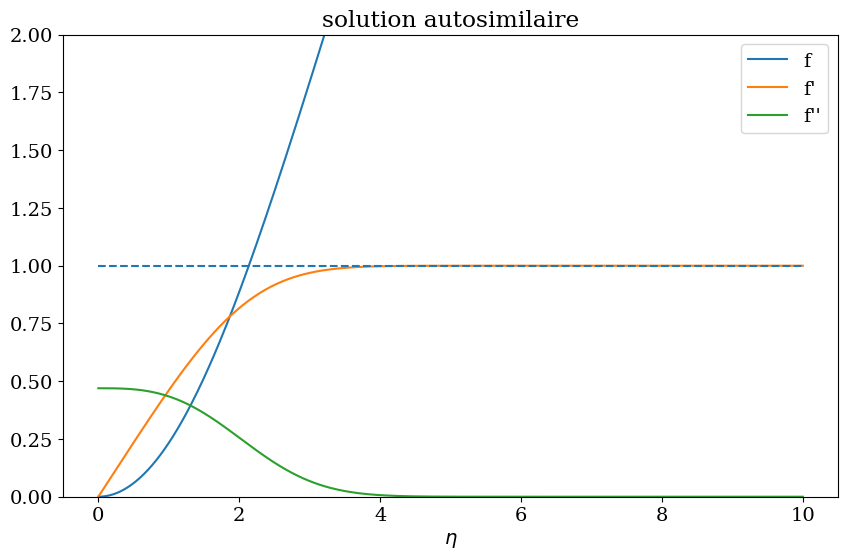

In [7]:
X,Y = Blasius(beta_opt)
plt.figure(figsize=(10,6))
plt.plot(X,Y[:,0],X,Y[:,1],X,Y[:,2])
plt.legend(["f","f'","f''"])
plt.xlabel("$\eta$")
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim(0,2)
plt.title("solution autosimilaire");

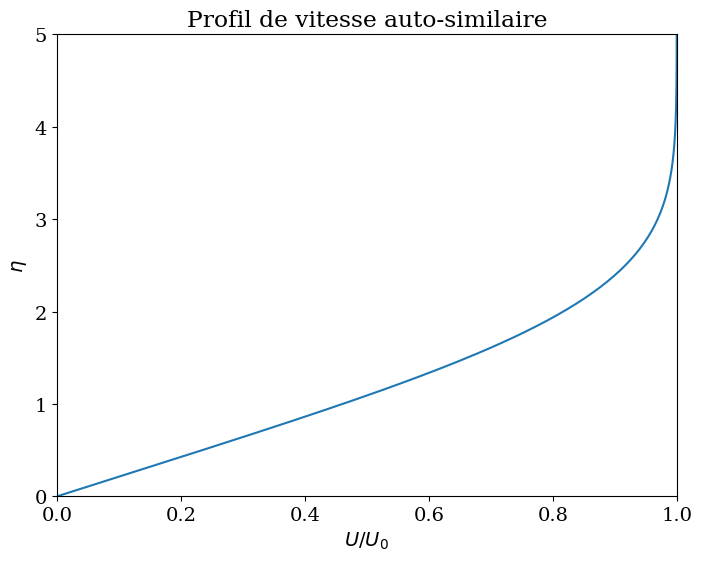

In [8]:
plt.figure(figsize=(8,6))
plt.plot(Y[:,1],X)
plt.ylim(0,5.)
plt.xlim(0,1.)
plt.xlabel("$U/U_0$")
plt.ylabel("$\eta$")
plt.title("Profil de vitesse auto-similaire");

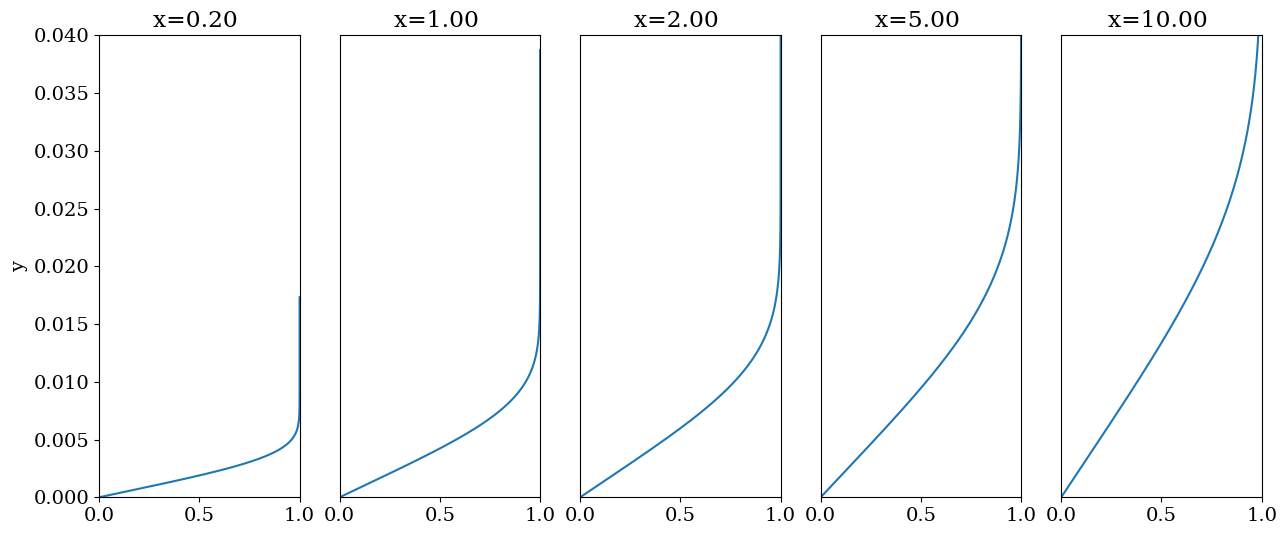

In [9]:
nu = 15e-6
U0 = 1.0
Xp  = np.array([0.2, 1., 2., 5.,10.])
plt.figure(figsize=(15,6))
for k,x in enumerate(Xp):
    eta0 = np.sqrt(U0/(nu*x))
    plt.subplot(1,len(Xp),k+1)
    ax = plt.gca()
    if k>0: 
        ax.get_yaxis().set_visible(False)
    else:
        plt.ylabel("y")
    plt.ylim(0,0.04)
    plt.xlim(0,1.)
    plt.plot(Y[:,1],(X/eta0))
    plt.title("x={:.2f} ".format(x))

eta0= 3.4669338677354706 0.9898703733702392


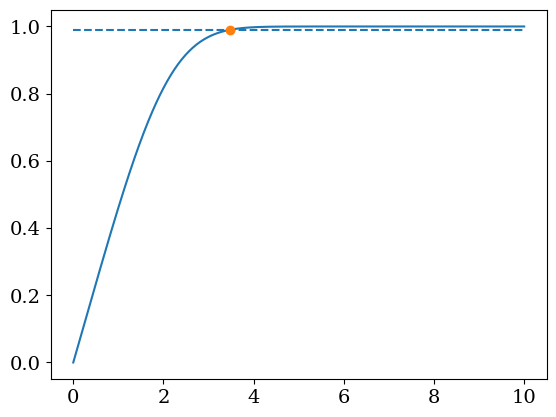

In [10]:
# valeur de eta0 tq V=0.99 U0
i0 = np.abs(Y[:,1]-0.99).argmin()
eta0 = X[i0]
print("eta0=",eta0,Y[i0,1])
plt.plot(X,Y[:,1])
plt.hlines(Y[i0,1],X[0],X[-1],linestyles='dashed')
plt.plot([eta0],[Y[i0,1]],'o')

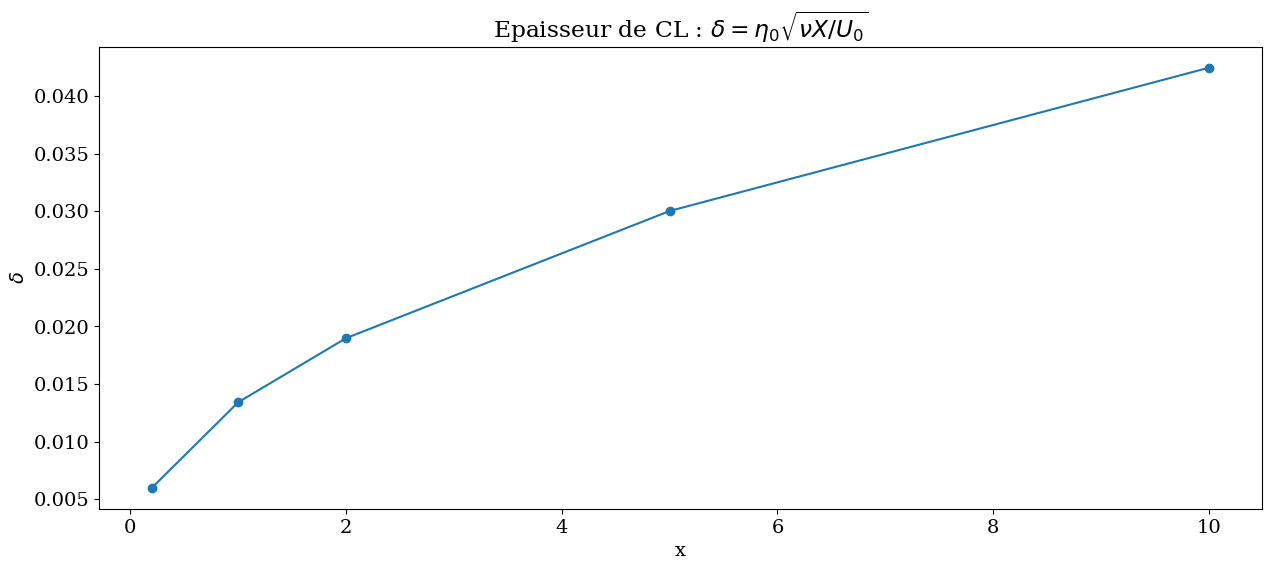

In [11]:
Delta = eta0*np.sqrt(nu*Xp/U0)
plt.figure(figsize=(15,6))
plt.plot(Xp,Delta,'-o')
plt.xlabel("x")
plt.ylabel("$\\delta$")
plt.title("Epaisseur de CL : $\\delta =\eta_0\\sqrt{\\nu X/U_0}$");

## Equation de Falkner Scan

- https://en.wikipedia.org/wiki/Falkner%E2%80%93Skan_boundary_layer

prise en compte d'un gradient de pression avec un champ de vitesse extérieur

$$ u_e(x) = U_0 \left(\frac{x}{L}\right)^m $$

recherche d'une solution auto-similaire
    $$ \eta = y \sqrt{\frac{U_0 (m+1)}{2 \nu L}}\left(\frac{x}{L}\right)^{(m-1)/2} $$ 

on se ramène a résoudre une EDO d'ordre 3

$$ f''' + f f'' + \beta ( 1 - (f')^2) = 0 $$


avec 
$$ \beta = \frac{ 2m }{m+1} $$

où m représente l'angle de la plaque / à l'horizontal

  - $m = 0$   blasius
  - $m < 0$   adverse pressure gradient
  - $m > 0$   favorable pressure gradient

### résolution numérique

In [12]:
def ODEFalkner(x,Y):
    global BETA
    '''systeme ODE Falkner scan'''
    dY = np.array([Y[1],Y[2],-Y[0]*Y[2] + BETA*(Y[1]**2 - 1.0 )])
    return dY
def Falkner(beta0):
    """resoud Falkner pour une valeur de beta"""
    Tmax = 10.
    X  = np.linspace(0,Tmax,50)
    Y0 = np.array([0,0,beta0])
    Y  = odeint(ODEFalkner,Y0,X,tfirst=True)
    return X,Y
def ErrFalkner(beta):
    """calcul l'erreur sur la CL en 0"""
    X,Y = Falkner(beta[0])
    err = Y[-1,1] - 1.0
    #print("beta={} err={}".format(Beta[0],err))
    return err

### gradient de pression favorable m > 0

In [13]:
m = 1
BETA = 2*m/(m+1)

err= -0.23391875896336956


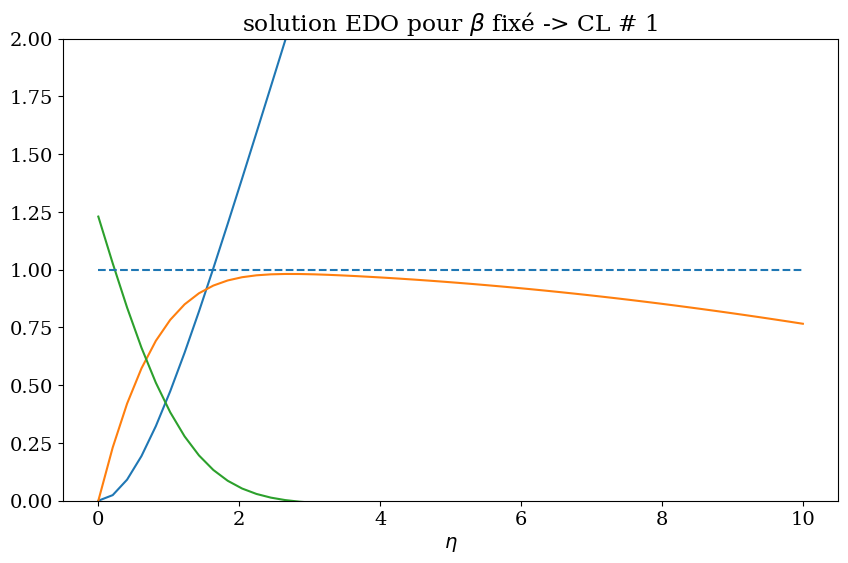

In [14]:
beta0 = 1.23
X1,Y1 = Falkner(beta0)
print("err=",ErrFalkner([beta0]))
plt.figure(figsize=(10,6))
plt.plot(X1,Y1[:,0],X1,Y1[:,1],X1,Y1[:,2]);
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim([0,2])
plt.xlabel("$\eta$")
plt.title("solution EDO pour $\\beta$ fixé -> CL # 1");

In [15]:

beta_opt= fsolve(ErrFalkner,[beta0])[0]
print("beta opt=",beta_opt)

beta opt= 1.2325876845844022


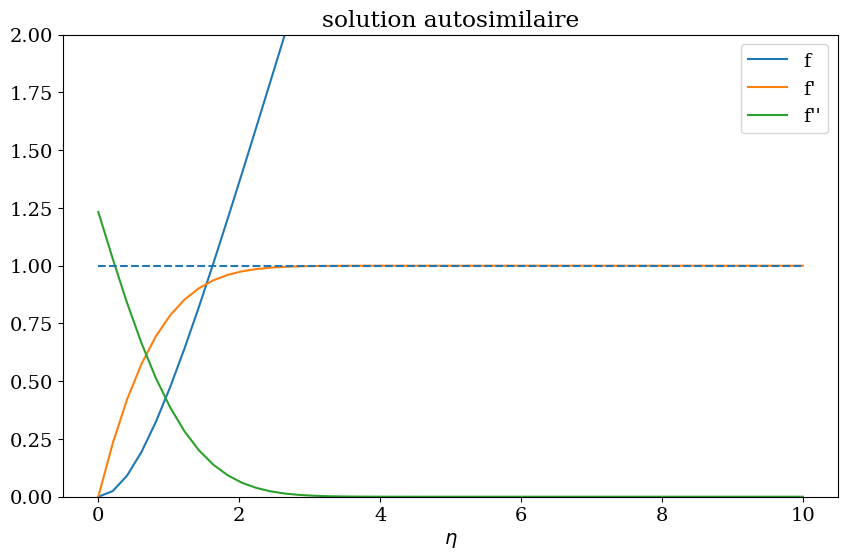

In [16]:
X1,Y1 = Falkner(beta_opt)
plt.figure(figsize=(10,6))
plt.plot(X1,Y1[:,0],X1,Y1[:,1],X1,Y1[:,2])
plt.legend(["f","f'","f''"])
plt.xlabel("$\eta$")
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim(0,2)
plt.title("solution autosimilaire");

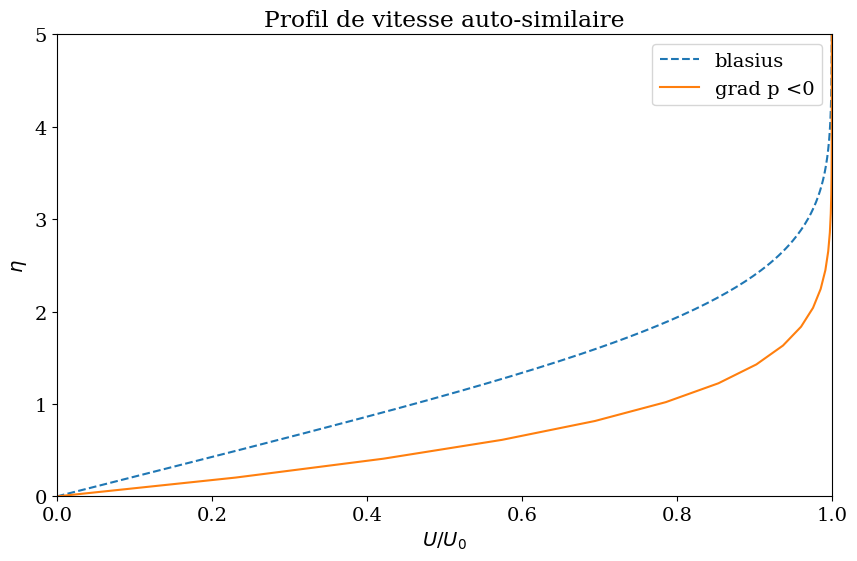

In [17]:
plt.figure(figsize=(10,6))
plt.plot(Y[:,1],X,'--',label="blasius")
plt.plot(Y1[:,1],X1,label="grad p <0")
plt.ylim(0,5.)
plt.xlim(0,1.)
plt.xlabel("$U/U_0$")
plt.ylabel("$\eta$")
plt.legend()
plt.title("Profil de vitesse auto-similaire");

### gradient de pression adverse

In [18]:
m = -0.08
BETA = 2*m/(m+1)

err= -0.014668533761202918


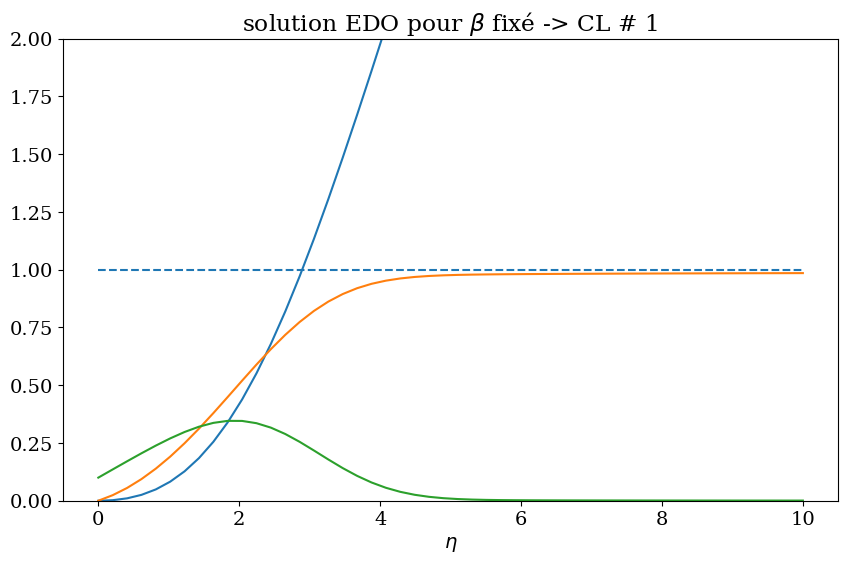

In [19]:
beta0 = 0.1
X2,Y2 = Falkner(beta0)
print("err=",ErrFalkner([beta0]))
plt.figure(figsize=(10,6))
plt.plot(X2,Y2[:,0],X2,Y2[:,1],X2,Y2[:,2]);
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim([0,2])
plt.xlabel("$\eta$")
plt.title("solution EDO pour $\\beta$ fixé -> CL # 1");

In [20]:
beta_opt= fsolve(ErrFalkner,[beta0])[0]
print("beta opt=",beta_opt)

beta opt= 0.1497356475032507


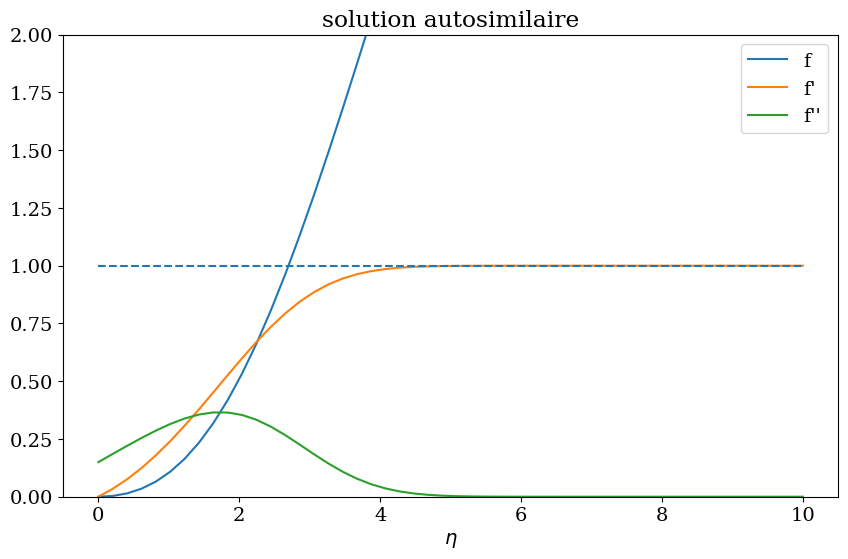

In [21]:
X2,Y2 = Falkner(beta_opt)
plt.figure(figsize=(10,6))
plt.plot(X2,Y2[:,0],X2,Y2[:,1],X2,Y2[:,2])
plt.legend(["f","f'","f''"])
plt.xlabel("$\eta$")
plt.hlines(1.,0,10.,linestyles='--')
plt.ylim(0,2)
plt.title("solution autosimilaire");

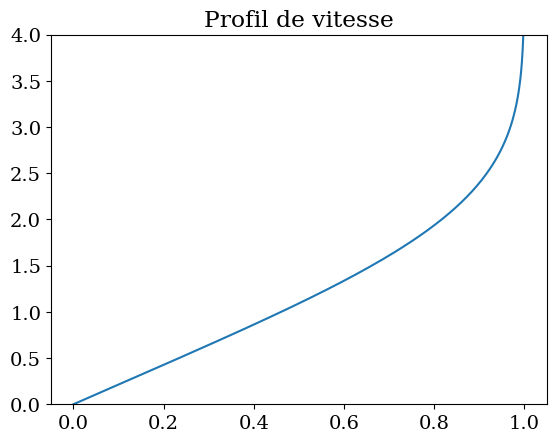

In [22]:
plt.plot(Y[:,1],X)
plt.ylim(0,4)
plt.title("Profil de vitesse");

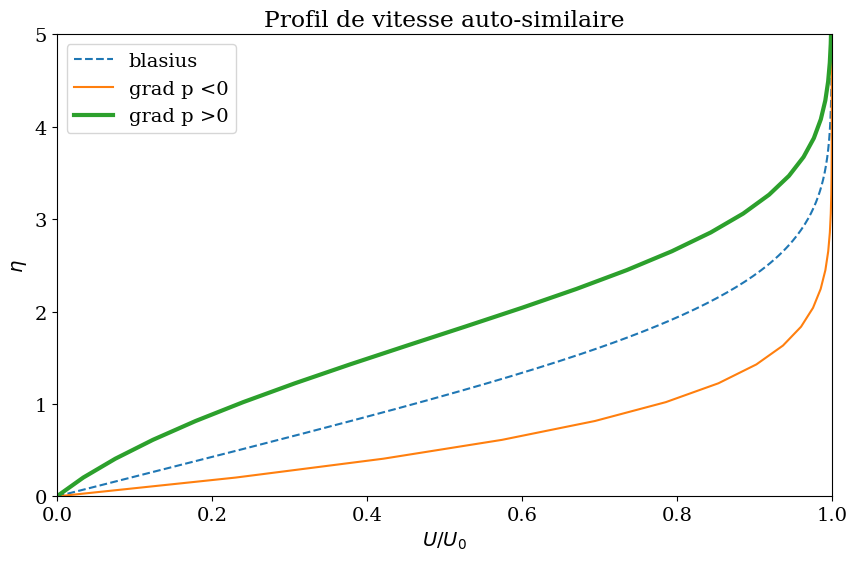

In [23]:
plt.figure(figsize=(10,6))
plt.plot(Y[:,1],X,'--',label="blasius")
plt.plot(Y1[:,1],X1,label="grad p <0")
plt.plot(Y2[:,1],X2,lw=3,label="grad p >0")
plt.ylim(0,5.)
plt.xlim(0,1.)
plt.xlabel("$U/U_0$")
plt.ylabel("$\eta$")
plt.legend()
plt.title("Profil de vitesse auto-similaire");

## Analyse dimensionnelle

1. paramètres : $U_0$ , $x$, $\delta$ , $\mu$ $\rho$
2. 2 nbres sans dimension: $Re_x = \frac{\rho U_0 x}{\mu} \gg 1$  et  $\epsilon = \frac{\delta }{x} \ll 1$$

- bilan de masse

$$ \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0$$

ordre de grandeur $V_0$ de v

$$ V_0 = \frac{\delta}{x} U_0 = \epsilon U_0 $$

- bilan de quantité de mouvement suivant x

$$ 
\rho u \left(\frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y}\right) = 
- \frac{\partial p}{\partial x} + \mu \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) 
$$

couhe limite laminaire stationnaire sans gradient de pression $p\approx cste$

$$ \rho u\frac{\partial u}{\partial x} \approx \rho v\frac{\partial u}{\partial y} \approx \mu \frac{\partial^2 u}{\partial y^2}  $$

d'où

$$\rho \frac{U_0^2}{x} \approx \mu \frac{U_0}{\delta ^2}$$

soit
 $$ \delta^2 = \frac{\mu x}{\rho U_0} \rightarrow  \epsilon \approx (Re_x) ^{-1/2}$$ 

## FIN